In [2]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

# import basic plot tools
from qiskit.visualization import plot_histogram

C:\Users\drith\AppData\Local\Temp/ipykernel_4344/2308665599.py:9: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [3]:
def dj_oracle(case, n):
    # Making a quantum circuit with n+1 qubit(size of input + output)
    oracle_qc = QuantumCircuit(n+1)
    
    # oracle is balanced
    if case == "balanced":
        # apply controlled-not gate for each qubit using output qubit as the target
        for qubit in range(n):
            oracle_qc.cx(qubit, n) # acts as parity checker(even number of 1s = 0, odd = 1), to make sure half of the input map to zero and half maps to 1.
            
    # oracle is constant
    if case == "constant":
        # decide a random integer between 0 or 1
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
            
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [4]:
def dj_algorithm(n, case = 'random'):
    dj_circuit = QuantumCircuit(n+1, n) # n+1 qubit, n calssical bits
    
    for qubit in range(n):
        dj_circuit.h(qubit)
        
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'
            
    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))
    
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i,i)
    return dj_circuit    

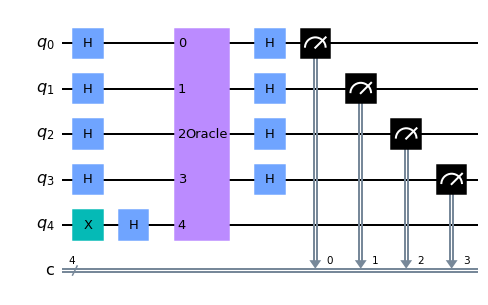

In [5]:
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw("mpl")

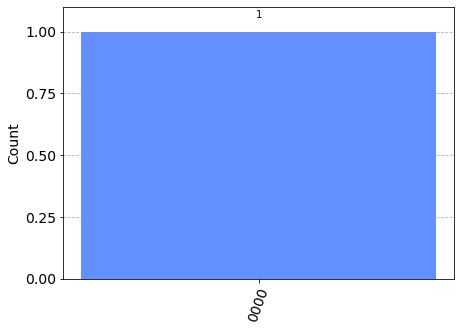

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n, 'constant')
results = execute(dj_circuit, backend=backend, shots=1).result()
answer = results.get_counts()

plot_histogram(answer)